In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
survey_patient = pd.read_csv("HCAHPS-CA-Hospital.csv",encoding='latin-1')
updated_sp = survey_patient.drop(["ZIP Code","Phone Number", "Patient Survey Star Rating Footnote","HCAHPS Answer Percent Footnote","Number of Completed Surveys Footnote","HCAHPS Answer Percent","HCAHPS Linear Mean Value","Survey Response Rate Percent Footnote","Measure Start Date", "Measure End Date"], axis=1)
updated_sp_na = updated_sp.drop(updated_sp[updated_sp["Patient Survey Star Rating"] == "Not Available"].index)
updated_sp_naa = updated_sp_na.drop(updated_sp_na[updated_sp_na["Patient Survey Star Rating"] == "Not Applicable"].index)
updated_sp_naa.head()

FileNotFoundError: File b'HCAHPS-CA-Hospital.csv' does not exist

In [3]:
all_rating = updated_sp_naa.pivot(index='Provider ID', columns='HCAHPS Measure ID', values='Patient Survey Star Rating').reset_index()
hospital_rating = all_rating.rename(columns={"H_CLEAN_STAR_RATING": "Cleanliness", 
                              "H_COMP_1_STAR_RATING":"Nurse_com", 
                              "H_COMP_2_STAR_RATING":"Doc_com", 
                              "H_COMP_3_STAR_RATING":"Staff_responsiveness",
                              "H_COMP_4_STAR_RATING": "Pain_management",
                              "H_COMP_5_STAR_RATING": "Comm_medicine", 
                              "H_COMP_6_STAR_RATING":"Discharge_info", 
                              "H_COMP_7_STAR_RATING": "Care_transition", 
                              "H_HSP_RATING_STAR_RATING": "Overall_Hos_Rating", 
                              "H_QUIET_STAR_RATING": "Quietness", 
                              "H_RECMND_STAR_RATING": "Recomm_hos", 
                              "H_STAR_RATING": "Summary_star"})
hospital_rating = hospital_rating.astype(int)
hospital_rating.to_csv("Hospital Rating.csv", index=False)

In [4]:
#basic_info = updated_sp_naa.drop(["HCAHPS Measure ID","HCAHPS Question","HCAHPS Answer Description","Patient Survey Star Rating","Number of Completed Surveys","Survey Response Rate Percent"], axis=1)
#basic_information = basic_info.drop_duplicates()
#merged_r = pd.merge(all_rating, basic_information, how="left", on="Provider ID")
#merged_rating = merged_r.rename(columns={"H_CLEAN_STAR_RATING": "Cleanliness", 
 #                             "H_COMP_1_STAR_RATING":"Nurse_com", 
  #                            "H_COMP_2_STAR_RATING":"Doc_com", 
   #                           "H_COMP_3_STAR_RATING":"Staff_responsiveness",
    #                          "H_COMP_4_STAR_RATING": "Pain_management",
     #                         "H_COMP_5_STAR_RATING": "Comm_medicine", 
      #                        "H_COMP_6_STAR_RATING":"Discharge_info", 
       #                       "H_COMP_7_STAR_RATING": "Care_transition", 
        #                      "H_HSP_RATING_STAR_RATING": "Overall_Hos_Rating", 
         #                     "H_QUIET_STAR_RATING": "Quietness", 
          #                    "H_RECMND_STAR_RATING": "Recomm_hos", 
           #                   "H_STAR_RATING": "Summary_star"})
#merged_rating.to_csv("Hospital Rating.csv", index=False)

In [5]:
hospital_rating = pd.read_csv("Hospital Rating.csv")
hospital_t_o = pd.read_csv("Hospital Type Ownership info.csv")
hos_merged = pd.merge(hospital_rating, hospital_t_o, on="Provider ID", how="inner")
hos_merged.to_csv("Hospital Ratings Merged.csv")

In [50]:
hos_merged.head()

,Provider ID,Cleanliness,Nurse_com,Doc_com,Staff_responsiveness,Pain_management,Comm_medicine,Discharge_info,Care_transition,Overall_Hos_Rating,...,Unnamed: 0,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership
0,50002,2,2,2,2,2,2,2,1,2,...,260,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,5107826200,Acute Care Hospitals,Voluntary non-profit - Church
1,50006,2,2,2,2,3,2,3,2,2,...,261,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,HUMBOLDT,7074458121,Acute Care Hospitals,Voluntary non-profit - Private
2,50007,3,4,3,3,4,3,3,4,5,...,262,MILLS-PENINSULA MEDICAL CENTER,1501 TROUSDALE DRIVE,BURLINGAME,CA,94010,SAN MATEO,6506965270,Acute Care Hospitals,Voluntary non-profit - Private
3,50008,2,2,3,2,3,2,2,2,3,...,263,CALIFORNIA PACIFIC MEDICAL CTR-DAVIES CAMPUS HOSP,601 DUBOCE AVE,SAN FRANCISCO,CA,94117,SAN FRANCISCO,4156006000,Acute Care Hospitals,Voluntary non-profit - Other
4,50009,2,3,3,3,3,3,3,2,3,...,264,QUEEN OF THE VALLEY MEDICAL CENTER,1000 TRANCAS ST,NAPA,CA,94558,NAPA,7072524411,Acute Care Hospitals,Voluntary non-profit - Church


## Correlation between the different rating categories
* Seaborn and Scipy packages have been used in addition to Pandas, Numpy and Matplotlib
* Among the eight rating categories : **_Nurse Communication, Doctor Communication, Pain Management and Care Transition_** have the highest positive correlation with the overall rating. This implies that these four factors impact the overall rating the most and this impact is in a positive fashion, meaning that, for example, a higher pain management corresponds to a higher overall rating.

In [1]:
#sns.pairplot(hos_merged['Cleanliness':'Overall_Hos_Rating'])
#plt.show()
df = hos_merged.loc[:, 'Cleanliness':'Overall_Hos_Rating']
#df.head()
#sns.pairplot(df)
#plt.show()

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("R = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(df)
g.map_lower(corrfunc)
g.map_upper(corrfunc)
plt.show()

NameError: name 'hos_merged' is not defined

In [44]:
grouped_hos_owner = hos_merged.groupby(["Hospital Ownership"])
grouped_hos_type = hos_merged.groupby(["Hospital Type"])
grouped_hos_county = hos_merged.groupby(["County Name"])


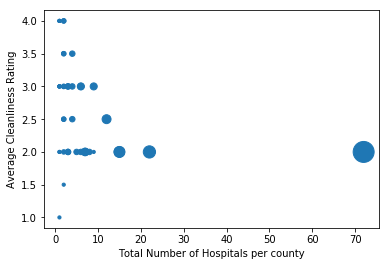

In [92]:
hospital_count_county = grouped_hos_county["Provider ID"].count()
hospital_clean_rate = grouped_hos_county ["Cleanliness"].median()
city_count_county = grouped_hos_county["City"].nunique()
plt.scatter(hospital_count_county, hospital_clean_rate, s=10*city_count_county)
plt.xlabel("Total Number of Hospitals per county")
plt.ylabel("Average Cleanliness Rating")
plt.show()

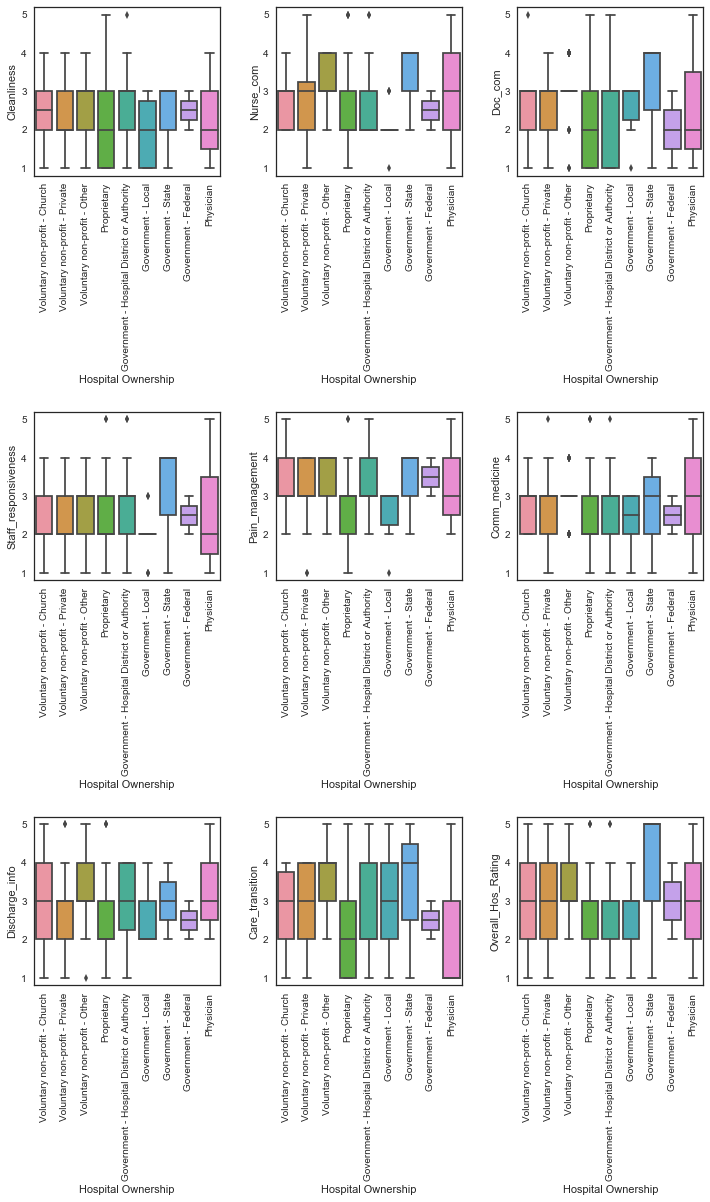

,Provider ID,Cleanliness,Nurse_com,Doc_com,Staff_responsiveness,Pain_management,Comm_medicine,Discharge_info,Care_transition,Overall_Hos_Rating,...,Unnamed: 0,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership
0,50002,2,2,2,2,2,2,2,1,2,...,260,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,5107826200,Acute Care Hospitals,Voluntary non-profit - Church
1,50006,2,2,2,2,3,2,3,2,2,...,261,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,HUMBOLDT,7074458121,Acute Care Hospitals,Voluntary non-profit - Private
2,50007,3,4,3,3,4,3,3,4,5,...,262,MILLS-PENINSULA MEDICAL CENTER,1501 TROUSDALE DRIVE,BURLINGAME,CA,94010,SAN MATEO,6506965270,Acute Care Hospitals,Voluntary non-profit - Private
3,50008,2,2,3,2,3,2,2,2,3,...,263,CALIFORNIA PACIFIC MEDICAL CTR-DAVIES CAMPUS HOSP,601 DUBOCE AVE,SAN FRANCISCO,CA,94117,SAN FRANCISCO,4156006000,Acute Care Hospitals,Voluntary non-profit - Other
4,50009,2,3,3,3,3,3,3,2,3,...,264,QUEEN OF THE VALLEY MEDICAL CENTER,1000 TRANCAS ST,NAPA,CA,94558,NAPA,7072524411,Acute Care Hospitals,Voluntary non-profit - Church


In [124]:
#sns.boxplot(x=hos_merged['Hospital Ownership'], y=hos_merged['Cleanliness'], data=hos_merged)
#plt.xticks(rotation=90)
#plt.show()

fig = plt.figure(figsize=(12,18))
fig.subplots_adjust(hspace=1.4, wspace=.3)
for idx, col in enumerate(hos_merged.columns[1:10]):
    fig.add_subplot(3, 3, idx+1)
    sns.boxplot(x=hos_merged['Hospital Ownership'], y=hos_merged[col], data=hos_merged)
    plt.xticks(rotation=90)
plt.show()
hos_merged.head()

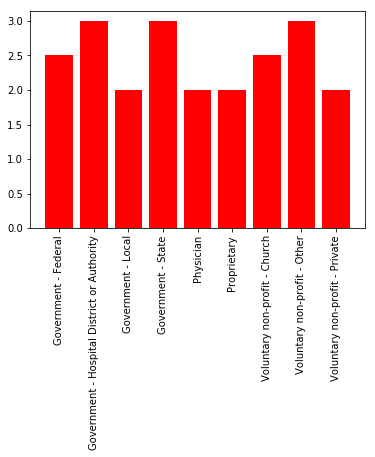

In [100]:
hos_clean_median = grouped_hos_owner["Cleanliness"].median()
x_axis = np.arange(len(hos_clean_median))
plt.bar(x_axis, hos_clean_median, color='r')
plt.xticks(x_axis, list(hos_clean_median.index), rotation="vertical")
plt.show()

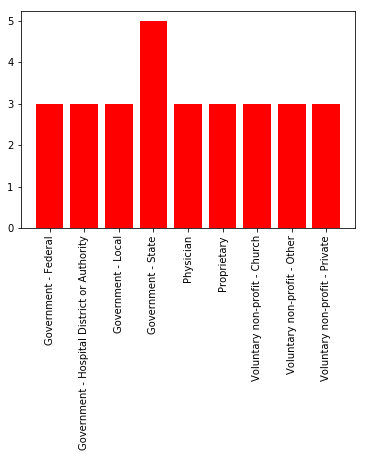

In [103]:
hos_overall_median = grouped_hos_owner["Overall_Hos_Rating"].median()
x_axis = np.arange(len(hos_overall_median))
plt.bar(x_axis, hos_overall_median, color='r')
plt.xticks(x_axis, list(hos_overall_median.index), rotation="vertical")
plt.show()

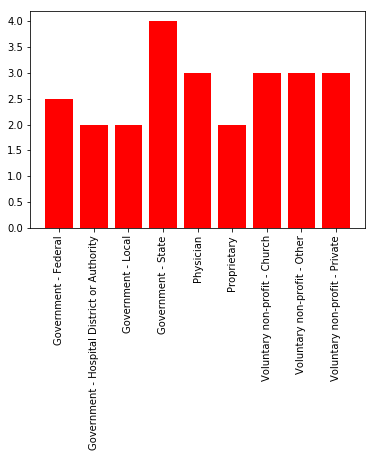

In [105]:
hos_nurse_median = grouped_hos_owner["Nurse_com"].median()
x_axis = np.arange(len(hos_nurse_median))
plt.bar(x_axis, hos_nurse_median, color='r')
plt.xticks(x_axis, list(hos_nurse_median.index), rotation="vertical")
plt.show()